In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
(x_train, y_train),  (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [11]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

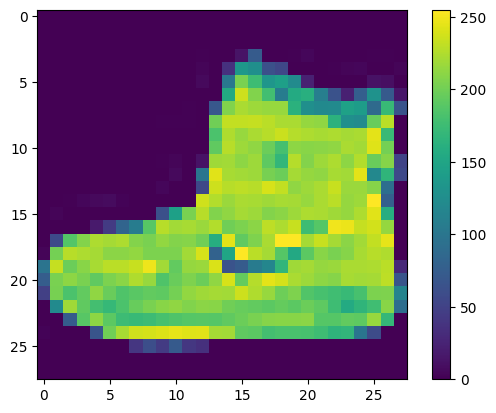

In [14]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = x_train / 255.0

test_images = x_test / 255.0

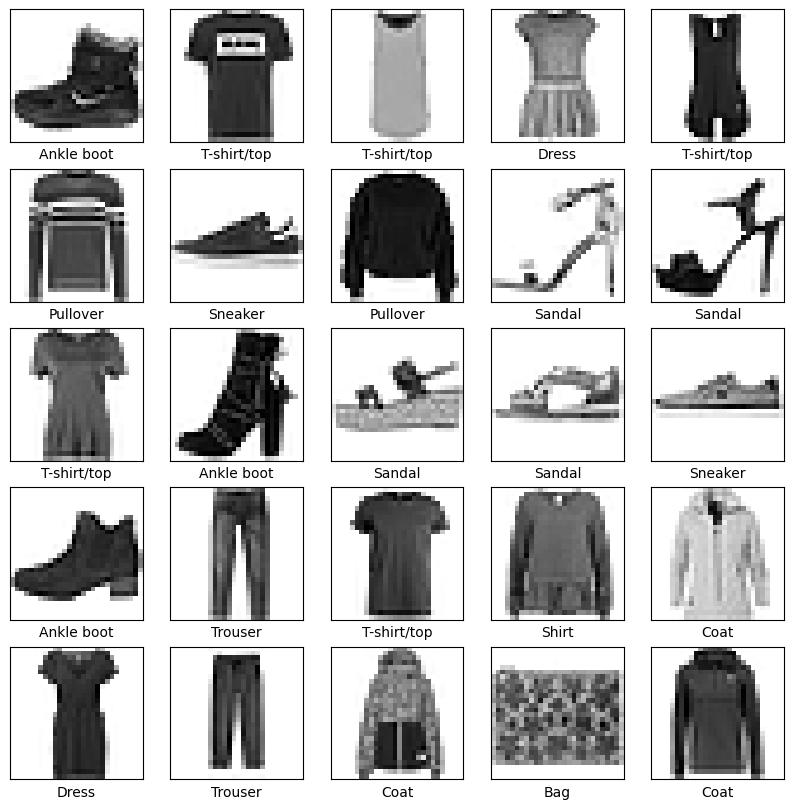

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [25]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [26]:
history = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_test, y_test_cat))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7612 - loss: 0.6613 - val_accuracy: 0.8598 - val_loss: 0.3902
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8725 - loss: 0.3421 - val_accuracy: 0.8733 - val_loss: 0.3478
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8949 - loss: 0.2852 - val_accuracy: 0.8884 - val_loss: 0.3033
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9024 - loss: 0.2592 - val_accuracy: 0.9005 - val_loss: 0.2699
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9127 - loss: 0.2357 - val_accuracy: 0.8965 - val_loss: 0.2824
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9168 - loss: 0.2238 - val_accuracy: 0.8933 - val_loss: 0.2920
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9201 - loss: 0.2149 - val_accuracy: 0.9005 - val_loss: 0.2815
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9235 - loss: 0

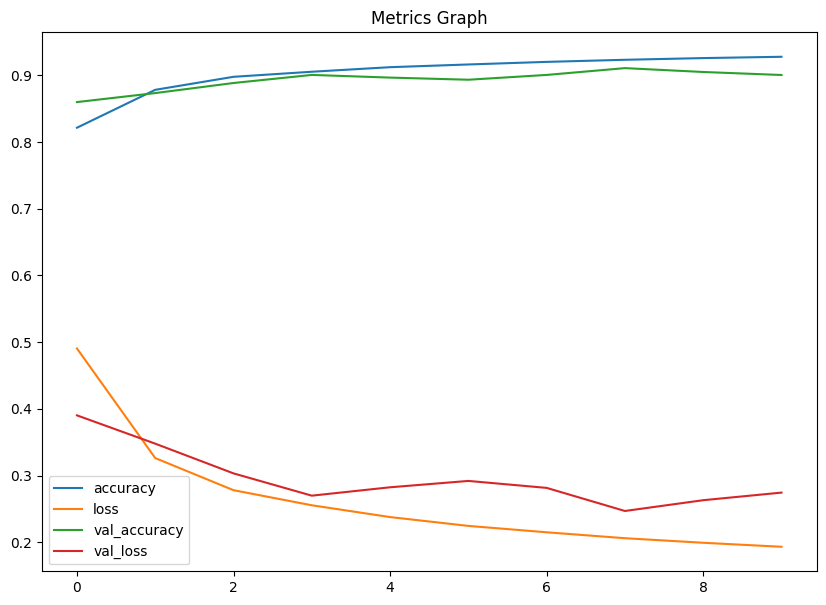

In [27]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [28]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9016 - loss: 0.2744


[0.2744693160057068, 0.9003999829292297]

In [38]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [39]:
predictions = tf.argmax(predictions, axis=1)

In [40]:
y_test = tf.argmax(y_test_cat, axis=1)

In [41]:
y_test = tf.Variable(y_test)

In [43]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.98      0.99      0.99      1000
           2       0.73      0.92      0.81      1000
           3       0.92      0.91      0.92      1000
           4       0.85      0.79      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.64      0.72      1000
           7       0.96      0.97      0.96      1000
           8       0.96      0.99      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



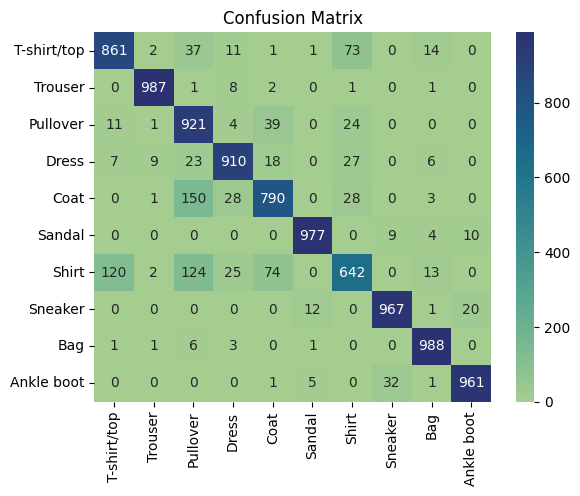

In [46]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, cmap='crest', annot=True, fmt=".0f", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


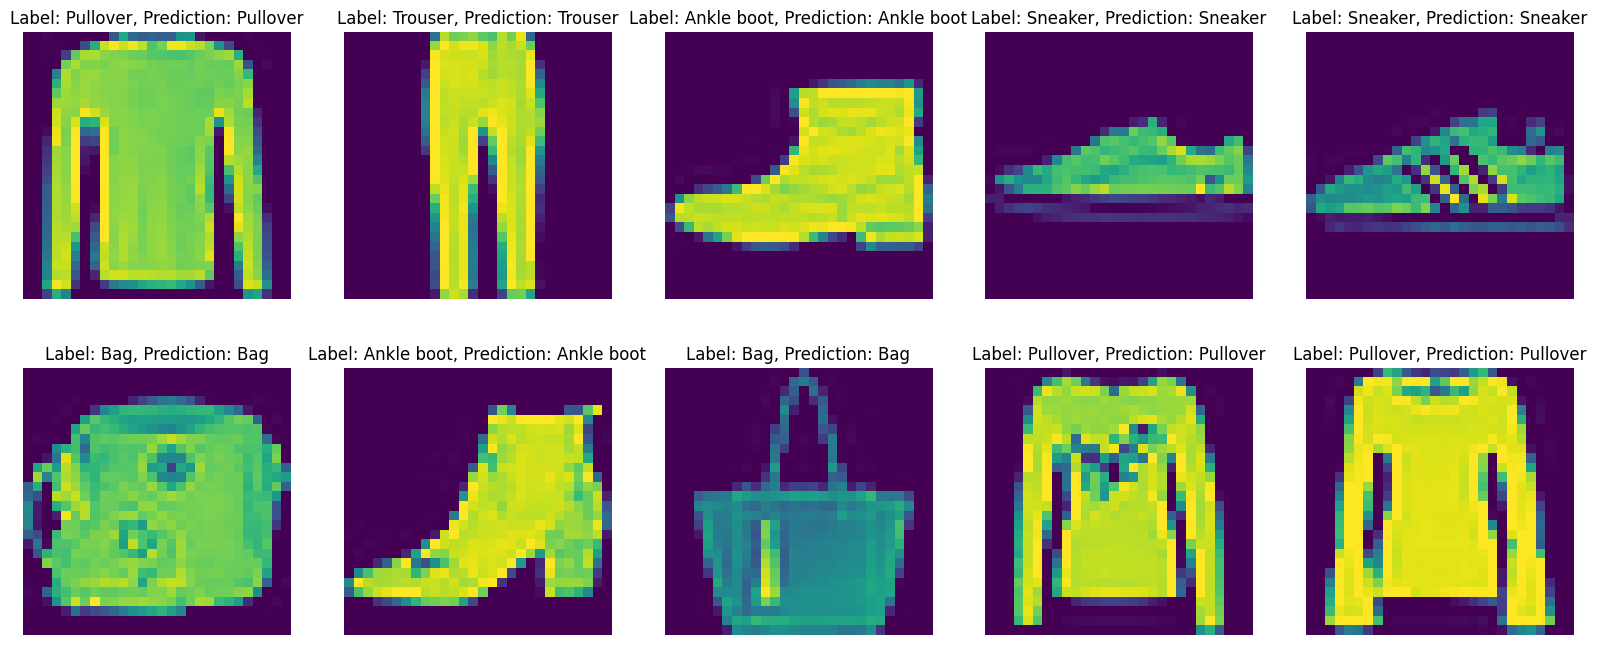

In [47]:
import random

images = []
labels = []
random_indices = random.sample(range(len(x_test)), 10)
for idx in random_indices:
    images.append(x_test[idx])
    labels.append(y_test_cat[idx])
images = np.array(images)
labels = np.array(labels)

fig = plt.figure(figsize=(20, 8))
rows = 2
cols = 5
x = 1
for image, label in zip(images, labels):
    fig.add_subplot(rows, cols, x)
    prediction = model.predict(tf.expand_dims(image, axis=0))
    prediction = class_names[tf.argmax(prediction.flatten())]
    label = class_names[tf.argmax(label)]
    plt.title(f"Label: {label}, Prediction: {prediction}")
    plt.imshow(image/255.)
    plt.axis("off")
    x += 1